In [1]:
from keras.models import load_model
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
from utils import *
%matplotlib inline

Using TensorFlow backend.
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ISYSRG.COM\Anaconda3\lib\site-packages\tensorflow\python

In [2]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        list_files = os.listdir(os.path.join(path, i))
        if len(list_files) > 10:
            for f in list_files:
                # Check file extension. Allow only jpg/jpeg' files.
                ext = os.path.splitext(f)[1]
                if ext == '.jpg' or ext == '.jpeg':
                    metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

def load_image(path):
    img = cv2.imread(path, 1)
    return img[...,::-1]

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

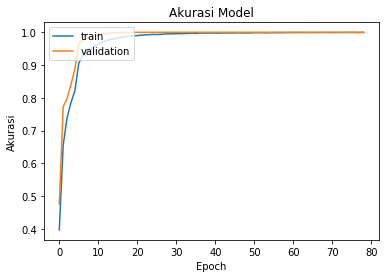

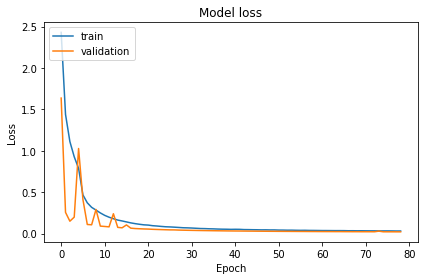

In [3]:
# summarize history for accuracy
log_data = pd.read_csv('model_inception50_5august/training.log')
plt.plot(log_data['accuracy'])
plt.plot(log_data['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(log_data['loss'])
plt.plot(log_data['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
#memuat model
model = load_model('model_inception50_5august/_inceptionV3_.08-0.98.hdf5',compile=False)
metadata = load_metadata('food-50-aug/test/')
print(f'Test data: {len(metadata)}')

Test data: 12500


In [12]:
def recognize(img):
    prediction = model.predict(np.expand_dims(img, axis=0))[0]

    return prediction

In [13]:
import pyprind


labels = pickle.load(open('label/label_50kelas','rb'))
y_pred = []

bar = pyprind.ProgBar(len(metadata),monitor=True, title='Proses Pengujian')
for data in metadata:
    path = data.image_path()
    img = load_img(path, target_size=(299, 299))
    img = img_to_array(img)
    pred = recognize(img)
    label = labels[np.argmax(pred)]
    y_pred.append(label)
    bar.update()
print(bar)

Proses Pengujian
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:51:09


Title: Proses Pengujian
  Started: 10/07/2020 09:03:42
  Finished: 10/07/2020 09:54:52
  Total time elapsed: 00:51:09
  CPU %: 610.60
  Memory %: 30.53


In [15]:
y_true = [data.name for data in metadata]

true_count = 0
for true, pred in zip(y_true, y_pred):
    if true == pred:
        true_count += 1
        
acc = (true_count/len(y_true)) * 100
print(f'Overall Accuracy: {acc}%')

Overall Accuracy: 99.032%


In [16]:
#library cnf_matrix
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
%%time
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Wall time: 0 ns


In [18]:
print(classification_report(y_true, y_pred, labels=labels))

                       precision    recall  f1-score   support

              baklava       0.99      1.00      0.99       250
             beignets       0.99      0.98      0.98       250
             bibimbap       1.00      0.99      0.99       250
         caesar_salad       1.00      1.00      1.00       250
              cannoli       1.00      1.00      1.00       250
        chicken_wings       0.99      1.00      0.99       250
       chocolate_cake       0.98      0.98      0.98       250
              churros       0.99      1.00      0.99       250
         clam_chowder       0.99      0.99      0.99       250
        club_sandwich       1.00      1.00      1.00       250
         creme_brulee       1.00      1.00      1.00       250
            cup_cakes       1.00      0.99      0.99       250
         deviled_eggs       1.00      0.98      0.99       250
               donuts       0.98      0.99      0.98       250
            dumplings       1.00      0.96      0.98  

Confusion Matrix, Tanpa Normalisasi
[[249   1   0 ...   0   0   0]
 [  0 245   0 ...   0   0   0]
 [  0   0 247 ...   0   0   0]
 ...
 [  0   0   0 ... 247   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 237]]


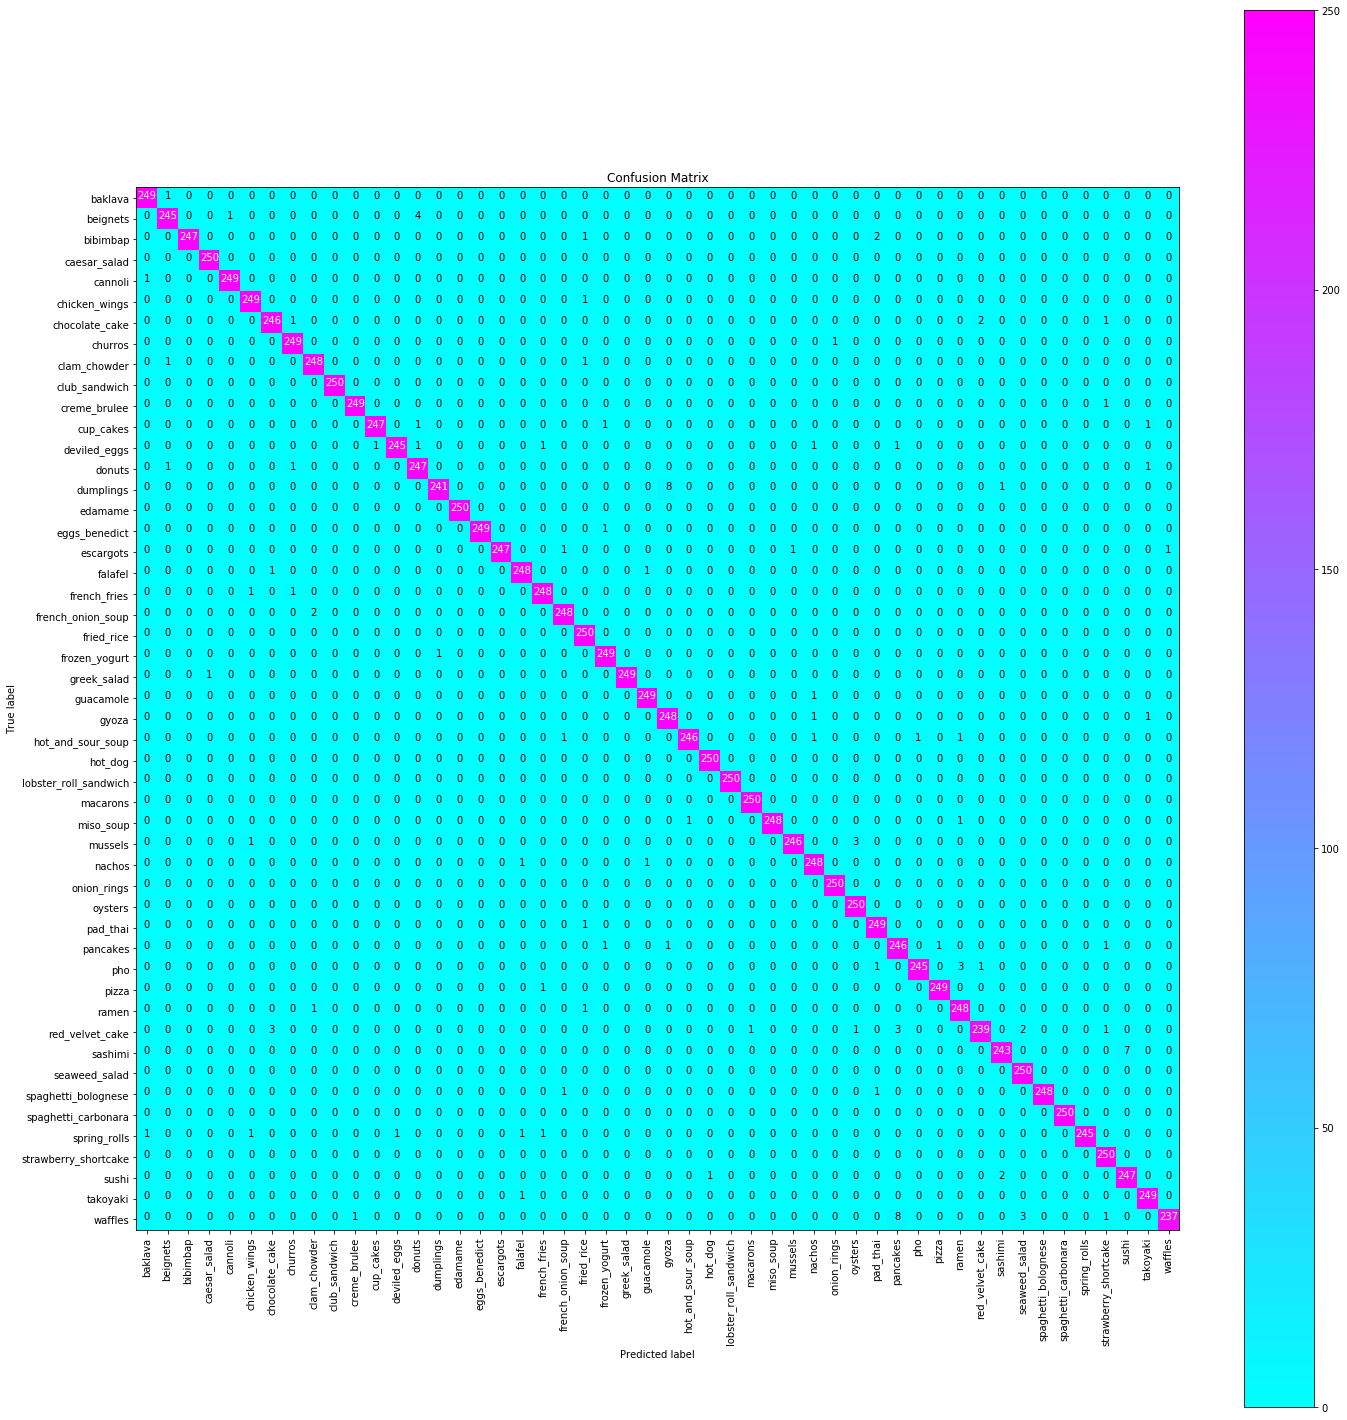

In [19]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    fungsi ini akan buat plot confusion matrix. 
    jk normalisasi, set `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Confusion Matrix, Normalisasi")
    else:
        print('Confusion Matrix, Tanpa Normalisasi')

    print(cm)

    thresh = cm.max() / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# hitungan
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

class_names = labels

plt.figure()
fig = plt.gcf()
fig.set_size_inches(20, 20)
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion Matrix',
                      cmap=plt.cm.cool)
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[249,   1,   0, ...,   0,   0,   0],
       [  0, 245,   0, ...,   0,   0,   0],
       [  0,   0, 247, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 247,   0,   0],
       [  0,   0,   0, ...,   0, 249,   0],
       [  0,   0,   0, ...,   0,   0, 237]], dtype=int64)

In [21]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# sensitivitas atau true positive rate
TPR = TP/(TP+FN)
# spesifisitas atau true negative rate
TNR = TN/(FP+TN) 
# presisi 
PPV = TP/(TP+FP)
# nilai presisi negatif
NPV = TN/(TN+FN)
# false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# akurasi keseluruhan
ACC = (TP+TN)/(TP+FP+FN+TN)
# akurasi tiap kelas rumus lain
accu = (TP+TN)/101927
#error
ERROR = (FP+FN)/(TP+FP+FN+TN)

In [22]:
# sensitivitas atau true positive rate
print(TPR)

[1.   0.98 0.99 1.   1.   1.   0.98 1.   0.99 1.   1.   0.99 0.98 0.99
 0.96 1.   1.   0.99 0.99 0.99 0.99 1.   1.   1.   1.   0.99 0.98 1.
 1.   1.   0.99 0.98 0.99 1.   1.   1.   0.98 0.98 1.   0.99 0.96 0.97
 1.   0.99 1.   0.98 1.   0.99 1.   0.95]


In [23]:
# spesifisitas atau true negative rate
print(TNR)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [24]:
# presisi 
print(PPV)

[0.99 0.99 1.   1.   1.   0.99 0.98 0.99 0.99 1.   1.   1.   1.   0.98
 1.   1.   1.   1.   0.99 0.99 0.99 0.98 0.99 1.   0.99 0.96 1.   1.
 1.   1.   1.   1.   0.98 1.   0.98 0.98 0.95 1.   1.   0.98 0.99 0.99
 0.98 1.   1.   1.   0.98 0.97 0.99 1.  ]


In [25]:
# nilai presisi negatif
print(NPV)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [26]:
# false positive rate
print(FPR)

[1.63e-04 2.45e-04 0.00e+00 8.16e-05 8.16e-05 2.45e-04 3.27e-04 2.45e-04
 2.45e-04 0.00e+00 8.16e-05 8.16e-05 8.16e-05 4.90e-04 8.16e-05 0.00e+00
 0.00e+00 0.00e+00 2.45e-04 2.45e-04 2.45e-04 4.08e-04 2.45e-04 0.00e+00
 1.63e-04 7.35e-04 8.16e-05 8.16e-05 0.00e+00 8.16e-05 0.00e+00 8.16e-05
 3.27e-04 8.16e-05 3.27e-04 3.27e-04 9.80e-04 8.16e-05 8.16e-05 4.08e-04
 2.45e-04 2.45e-04 4.08e-04 0.00e+00 0.00e+00 0.00e+00 4.08e-04 5.71e-04
 2.45e-04 8.16e-05]


In [27]:
# False negative rate
print(FNR)

[0.   0.02 0.01 0.   0.   0.   0.02 0.   0.01 0.   0.   0.01 0.02 0.01
 0.04 0.   0.   0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.01 0.02 0.
 0.   0.   0.01 0.02 0.01 0.   0.   0.   0.02 0.02 0.   0.01 0.04 0.03
 0.   0.01 0.   0.02 0.   0.01 0.   0.05]


In [28]:
# False discovery rate
print(FDR)

[0.01 0.01 0.   0.   0.   0.01 0.02 0.01 0.01 0.   0.   0.   0.   0.02
 0.   0.   0.   0.   0.01 0.01 0.01 0.02 0.01 0.   0.01 0.04 0.   0.
 0.   0.   0.   0.   0.02 0.   0.02 0.02 0.05 0.   0.   0.02 0.01 0.01
 0.02 0.   0.   0.   0.02 0.03 0.01 0.  ]


In [29]:
# akurasi keseluruhan
print(ACC)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [30]:
#true positive
print(TP)

[249. 245. 247. 250. 249. 249. 246. 249. 248. 250. 249. 247. 245. 247.
 241. 250. 249. 247. 248. 248. 248. 250. 249. 249. 249. 248. 246. 250.
 250. 250. 248. 246. 248. 250. 250. 249. 246. 245. 249. 248. 239. 243.
 250. 248. 250. 245. 250. 247. 249. 237.]


In [31]:
#true negative
print(TN)

[12248. 12247. 12250. 12249. 12249. 12247. 12246. 12247. 12247. 12250.
 12249. 12249. 12249. 12244. 12249. 12250. 12250. 12250. 12247. 12247.
 12247. 12245. 12247. 12250. 12248. 12241. 12249. 12249. 12250. 12249.
 12250. 12249. 12246. 12249. 12246. 12246. 12238. 12249. 12249. 12245.
 12247. 12247. 12245. 12250. 12250. 12250. 12245. 12243. 12247. 12249.]


In [32]:
#false positive
print(FP)

[ 2.  3.  0.  1.  1.  3.  4.  3.  3.  0.  1.  1.  1.  6.  1.  0.  0.  0.
  3.  3.  3.  5.  3.  0.  2.  9.  1.  1.  0.  1.  0.  1.  4.  1.  4.  4.
 12.  1.  1.  5.  3.  3.  5.  0.  0.  0.  5.  7.  3.  1.]


In [33]:
#false negative
print(FN)

[ 1.  5.  3.  0.  1.  1.  4.  1.  2.  0.  1.  3.  5.  3.  9.  0.  1.  3.
  2.  2.  2.  0.  1.  1.  1.  2.  4.  0.  0.  0.  2.  4.  2.  0.  0.  1.
  4.  5.  1.  2. 11.  7.  0.  2.  0.  5.  0.  3.  1. 13.]


In [34]:
#error
print(ERROR)

[2.40e-04 6.40e-04 2.40e-04 8.00e-05 1.60e-04 3.20e-04 6.40e-04 3.20e-04
 4.00e-04 0.00e+00 1.60e-04 3.20e-04 4.80e-04 7.20e-04 8.00e-04 0.00e+00
 8.00e-05 2.40e-04 4.00e-04 4.00e-04 4.00e-04 4.00e-04 3.20e-04 8.00e-05
 2.40e-04 8.80e-04 4.00e-04 8.00e-05 0.00e+00 8.00e-05 1.60e-04 4.00e-04
 4.80e-04 8.00e-05 3.20e-04 4.00e-04 1.28e-03 4.80e-04 1.60e-04 5.60e-04
 1.12e-03 8.00e-04 4.00e-04 1.60e-04 0.00e+00 4.00e-04 4.00e-04 8.00e-04
 3.20e-04 1.12e-03]
